<a href="https://colab.research.google.com/github/knaresh12345678/google-play-store-apps/blob/main/Google_Play_Store_Apps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Google play store apps
### By: Naresh.k
### Dataset: ClinicalTrials.gov COVID Dataset
### Phone number: 9500643729
### Mail: naresh31102005@gmail.com

# **PHASE A**

CELL 1:Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)


CELL 2 — Upload the 2 CSV Files in Colab and importing

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving googleplaystore_user_reviews.csv to googleplaystore_user_reviews.csv
Saving googleplaystore.csv to googleplaystore.csv


In [ ]:
import io

df_apps = pd.read_csv(io.BytesIO(uploaded['googleplaystore.csv']))
df_reviews = pd.read_csv(io.BytesIO(uploaded['googleplaystore_user_reviews.csv']))


CELL 3: checking

In [ ]:
df_apps.head()


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
df_reviews.head()


# **PHASE B — DATA CLEANING & PREPROCESSING**

CELL 1 — Remove Duplicates

In [ ]:
before = len(df_apps)
df_apps = df_apps.drop_duplicates()
after = len(df_apps)

print("Duplicates removed:", before - after)
print("Final rows:", after)


Duplicates removed: 483
Final rows: 10358


CELL 2 — Check Missing Values

In [ ]:
df_apps.isnull().sum()


,0
App,0
Category,0
Rating,1465
Reviews,0
Size,0
Installs,0
Type,1
Price,0
Content Rating,1
Genres,0


CELL 3 — Drop Rows with Too Many Missing Values

In [ ]:
df_apps = df_apps.dropna(subset=['App', 'Category', 'Rating', 'Reviews'])
print("Rows after dropping key missing values:", len(df_apps))


Rows after dropping key missing values: 8893


CELL 4 — Clean Installs Column

In [ ]:
df_apps['Installs'] = df_apps['Installs'].astype(str).str.replace('+','', regex=False).str.replace(',','')
df_apps['Installs'] = pd.to_numeric(df_apps['Installs'], errors='coerce')

CELL 5 — Clean Price Column

In [ ]:
df_apps['Price'] = df_apps['Price'].str.replace('$','')
df_apps['Price'] = pd.to_numeric(df_apps['Price'], errors='coerce')


CELL 6 — Clean Size Column

In [ ]:
def convert_size(size):
    size = str(size)
    if 'M' in size:
        return float(size.replace('M',''))
    elif 'k' in size or 'K' in size:
        return float(size.replace('k','').replace('K','')) / 1024
    else:
        return np.nan

df_apps['Size_MB'] = df_apps['Size'].apply(convert_size)


CELL 7 — Fix Rating Column (Remove Outliers)

In [ ]:
df_apps = df_apps[(df_apps['Rating'] >= 1.0) & (df_apps['Rating'] <= 5.0)]
print("Rows after fixing rating:", len(df_apps))


Rows after fixing rating: 8892


CELL 8 — Convert Data Types

In [ ]:
df_apps['Reviews'] = pd.to_numeric(df_apps['Reviews'], errors='coerce')
df_apps['Installs'] = pd.to_numeric(df_apps['Installs'], errors='coerce')
df_apps['Price'] = pd.to_numeric(df_apps['Price'], errors='coerce')


/tmp/ipython-input-2730513761.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_apps['Reviews'] = pd.to_numeric(df_apps['Reviews'], errors='coerce')
/tmp/ipython-input-2730513761.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_apps['Installs'] = pd.to_numeric(df_apps['Installs'], errors='coerce')
/tmp/ipython-input-2730513761.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

CELL 9 — Drop Rows Still Having NaN in Important Columns

In [ ]:
df_apps = df_apps.dropna(subset=['Installs', 'Reviews', 'Price', 'Size_MB'])
len(df_apps)


7424

# **PHASE C — FEATURE ENGINEERING**

CELL 1 — Create Installs Category

In [ ]:
def install_group(installs):
    if installs < 10000:
        return "Low"
    elif installs < 500000:
        return "Medium"
    elif installs < 10000000:
        return "High"
    else:
        return "Top"

df_apps['Installs_Category'] = df_apps['Installs'].apply(install_group)


CELL 2 — Create Paid_or_Free Column

In [ ]:
df_apps['Paid_or_Free'] = df_apps['Price'].apply(lambda x: "Free" if x == 0 else "Paid")

CELL 3 — Confirm New Columns

In [ ]:
df_apps[['App', 'Installs', 'Installs_Category', 'Price', 'Paid_or_Free', 'Size_MB']].head()


,App,Installs,Installs_Category,Price,Paid_or_Free,Size_MB
0,Photo Editor & Candy Camera & Grid & ScrapBook,10000.0,Medium,0.0,Free,19.0
1,Coloring book moana,500000.0,High,0.0,Free,14.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",5000000.0,High,0.0,Free,8.7
3,Sketch - Draw & Paint,50000000.0,Top,0.0,Free,25.0
4,Pixel Draw - Number Art Coloring Book,100000.0,Medium,0.0,Free,2.8


# **PHASE D — EXPLORATORY DATA ANALYSIS**

CELL 1 — Distribution of Ratings

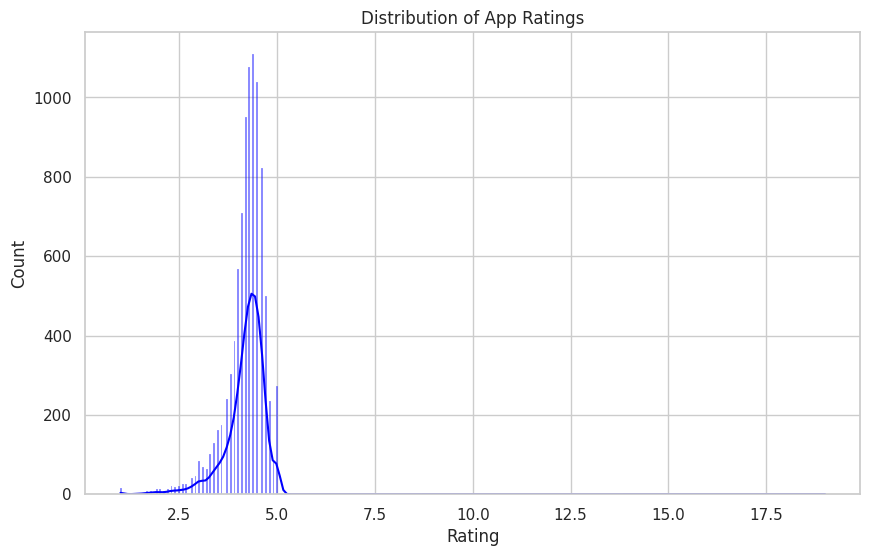

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(df_apps['Rating'], kde=True, color='blue')
plt.title("Distribution of App Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()


CELL 2 — Count of Apps by Category

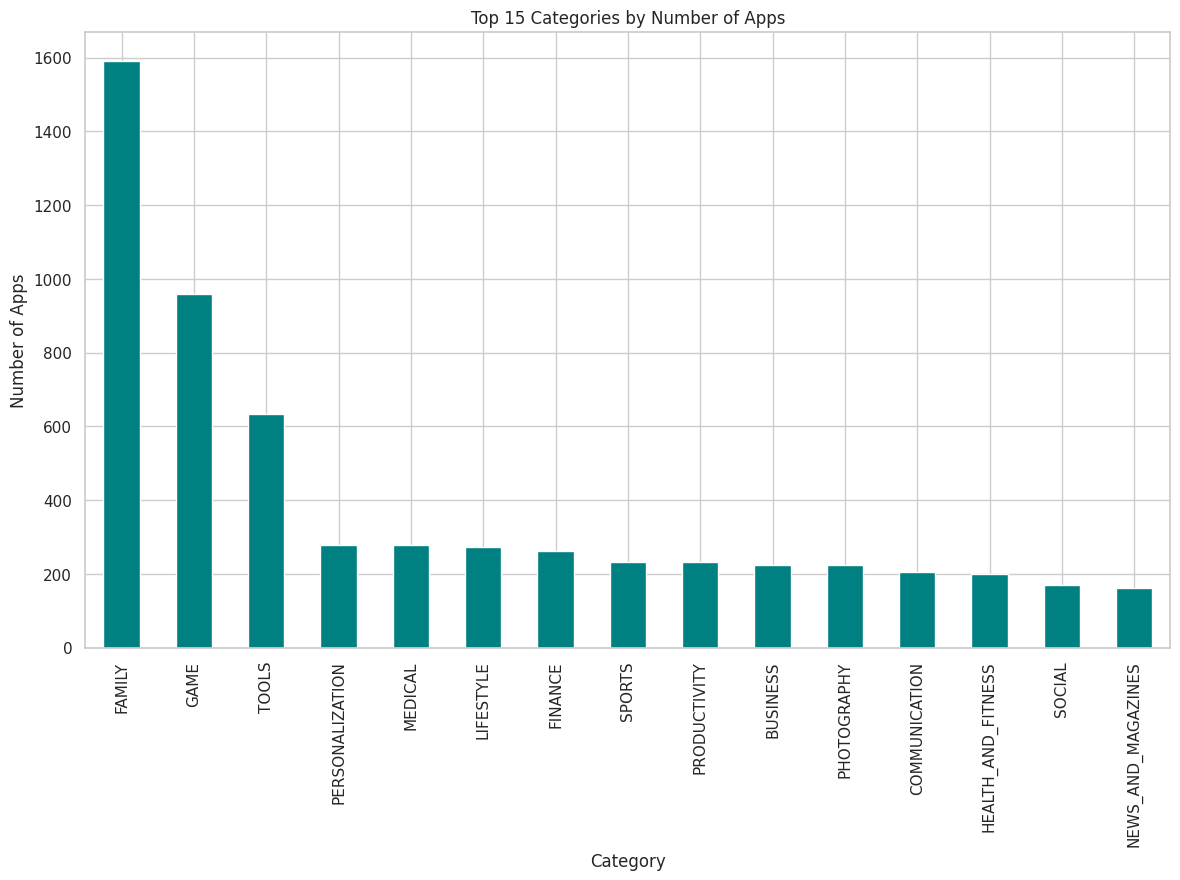

In [ ]:
plt.figure(figsize=(14,8))
df_apps['Category'].value_counts().head(15).plot(kind='bar', color='teal')
plt.title("Top 15 Categories by Number of Apps")
plt.xlabel("Category")
plt.ylabel("Number of Apps")
plt.show()


CELL 3 — Installs vs Rating

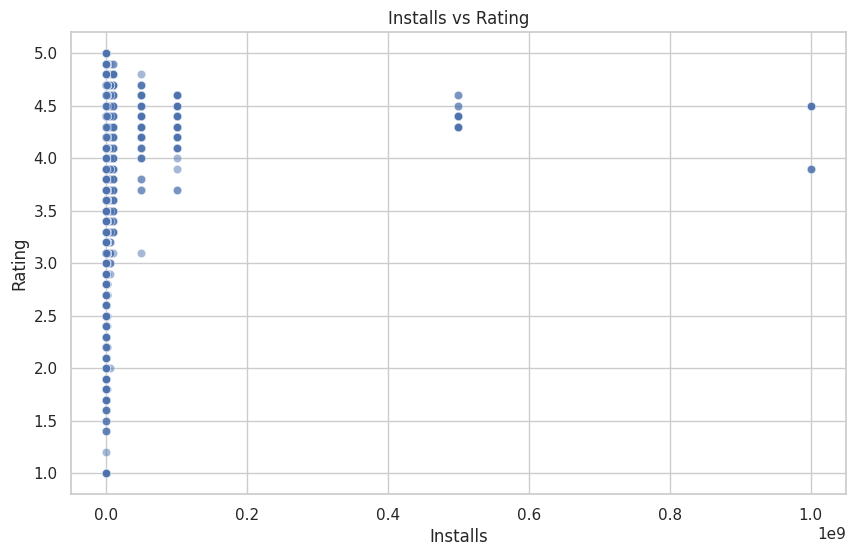

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=df_apps['Installs'], y=df_apps['Rating'], alpha=0.5)
plt.title("Installs vs Rating")
plt.xlabel("Installs")
plt.ylabel("Rating")
plt.show()


CELL 4 — Reviews vs Installs

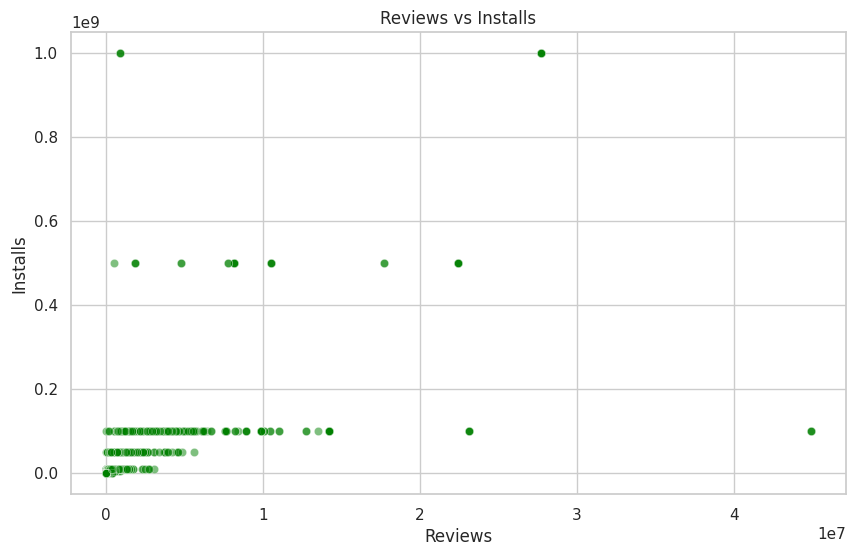

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=df_apps['Reviews'], y=df_apps['Installs'], alpha=0.5, color='green')
plt.title("Reviews vs Installs")
plt.xlabel("Reviews")
plt.ylabel("Installs")
plt.show()


CELL 5 — Free vs Paid Apps Count

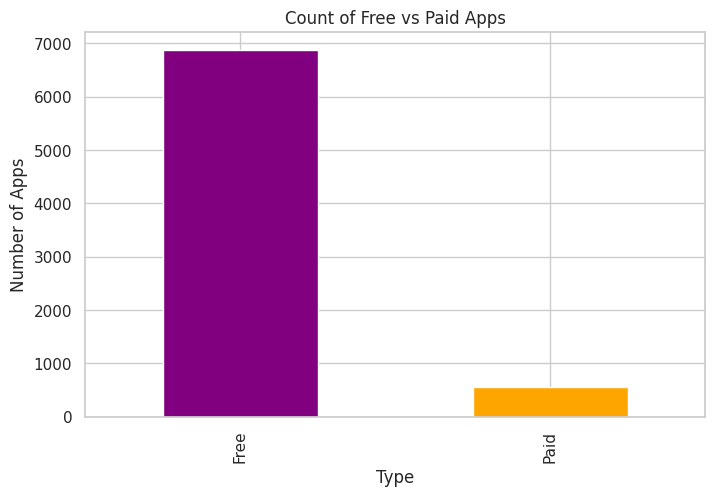

In [ ]:
plt.figure(figsize=(8,5))
df_apps['Paid_or_Free'].value_counts().plot(kind='bar', color=['purple','orange'])
plt.title("Count of Free vs Paid Apps")
plt.xlabel("Type")
plt.ylabel("Number of Apps")
plt.show()


CELL 6 — App Size Distribution

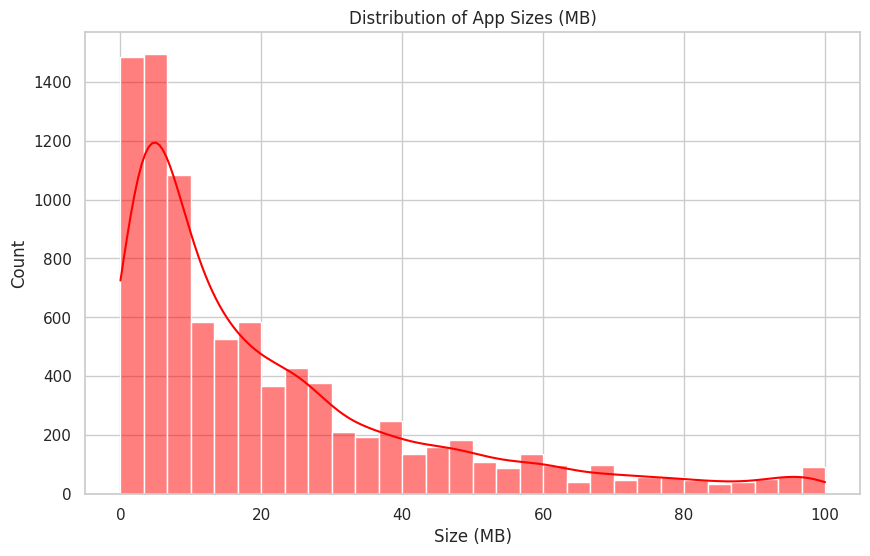

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(df_apps['Size_MB'], bins=30, kde=True, color='red')
plt.title("Distribution of App Sizes (MB)")
plt.xlabel("Size (MB)")
plt.ylabel("Count")
plt.show()


CELL 7 — Top Genres

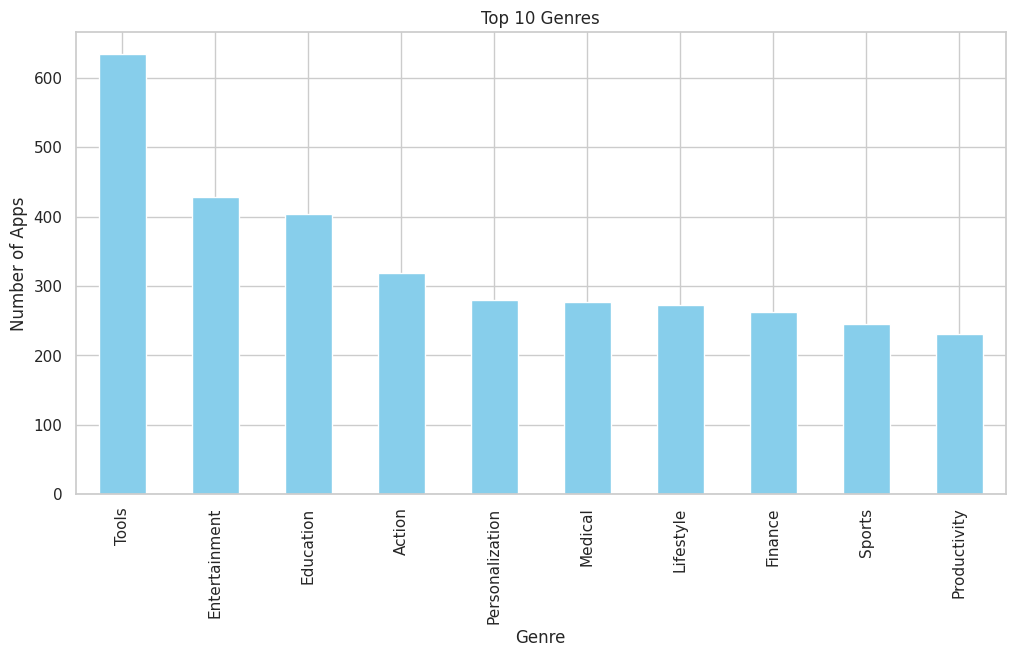

In [ ]:
plt.figure(figsize=(12,6))
df_apps['Genres'].value_counts().head(10).plot(kind='bar', color='skyblue')
plt.title("Top 10 Genres")
plt.xlabel("Genre")
plt.ylabel("Number of Apps")
plt.show()


# **PHASE E — Research Questions**

***RQ1. Which app categories have the highest average rating?***

CELL 1 — Calculate Average Rating per Category

In [ ]:
category_rating = df_apps.groupby('Category')['Rating'].mean().sort_values(ascending=False)
category_rating.head(10)


,Rating
Category,
EVENTS,4.478947
EDUCATION,4.380000
ART_AND_DESIGN,4.361017
PARENTING,4.347727
PERSONALIZATION,4.324731
BOOKS_AND_REFERENCE,4.321678
BEAUTY,4.291892
GAME,4.265693
SOCIAL,4.260588


CELL 2 — Plot Top 10 Highest Rated Categories

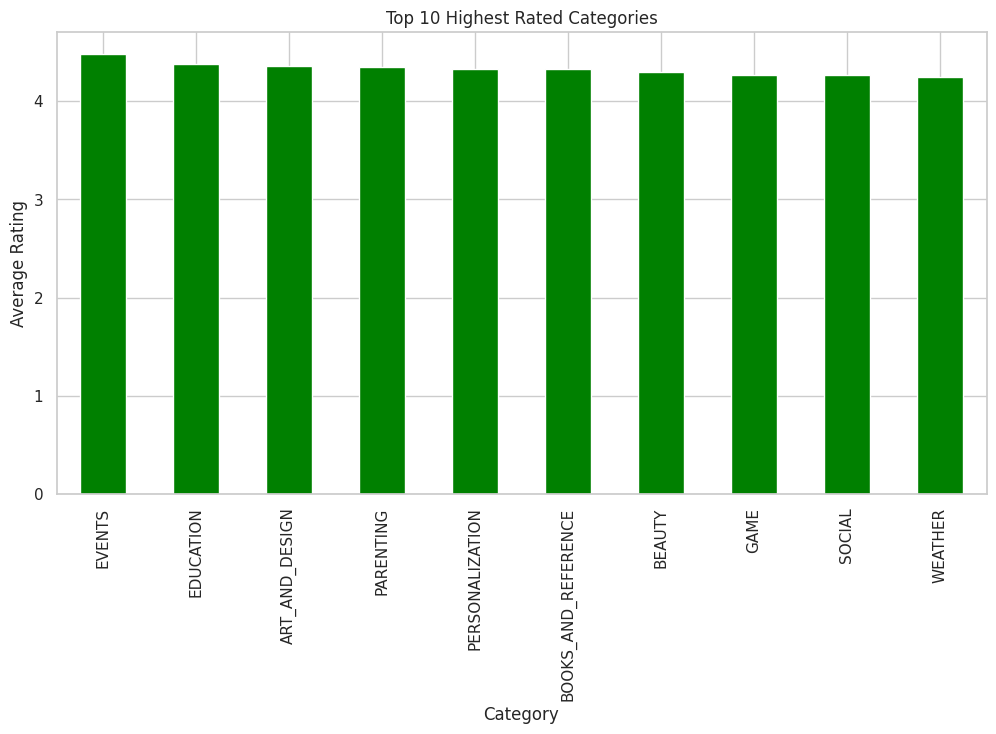

In [ ]:
plt.figure(figsize=(12,6))
category_rating.head(10).plot(kind='bar', color='green')
plt.title("Top 10 Highest Rated Categories")
plt.xlabel("Category")
plt.ylabel("Average Rating")
plt.show()


CELL 3 — Final Interpretation

In [ ]:
top_category = category_rating.index[0]
top_rating = round(category_rating.iloc[0], 2)

print("RQ1 FINAL INTERPRETATION:\n")

RQ1 FINAL INTERPRETATION:



***RQ2 — Do paid apps receive better ratings than free apps?***

CELL 1 — Average Rating for Free vs Paid

In [ ]:
paid_free_rating = df_apps.groupby('Paid_or_Free')['Rating'].mean()
paid_free_rating


,Rating
Paid_or_Free,
Free,4.165261
Paid,4.247349


CELL 2 — Plot Rating Comparison

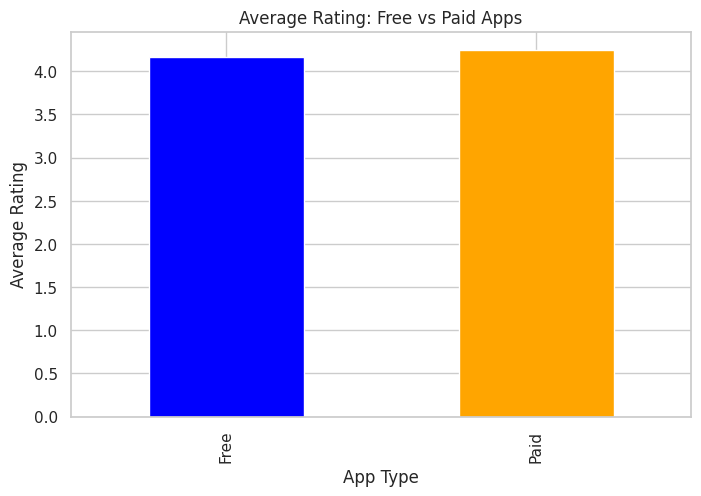

In [ ]:
plt.figure(figsize=(8,5))
paid_free_rating.plot(kind='bar', color=['blue','orange'])
plt.title("Average Rating: Free vs Paid Apps")
plt.xlabel("App Type")
plt.ylabel("Average Rating")
plt.show()


CELL 3 — Final Interpretation

In [ ]:
free_rating = round(paid_free_rating['Free'], 2)
paid_rating = round(paid_free_rating['Paid'], 2)

print("RQ2 FINAL INTERPRETATION:\n")

*RQ3 — Which categories have the highest number of installs?*

CELL 1 — Total Installs per Category

In [ ]:
category_installs = df_apps.groupby('Category')['Installs'].sum().sort_values(ascending=False)
category_installs.head(10)


,Installs
Category,
GAME,2.680245e+10
FAMILY,6.696863e+09
TOOLS,3.526054e+09
COMMUNICATION,3.336916e+09
NEWS_AND_MAGAZINES,3.214901e+09
PRODUCTIVITY,2.711302e+09
PHOTOGRAPHY,2.390893e+09
SHOPPING,1.312732e+09
SPORTS,1.062411e+09


CELL 2 — Plot Top 10 Categories by Installs

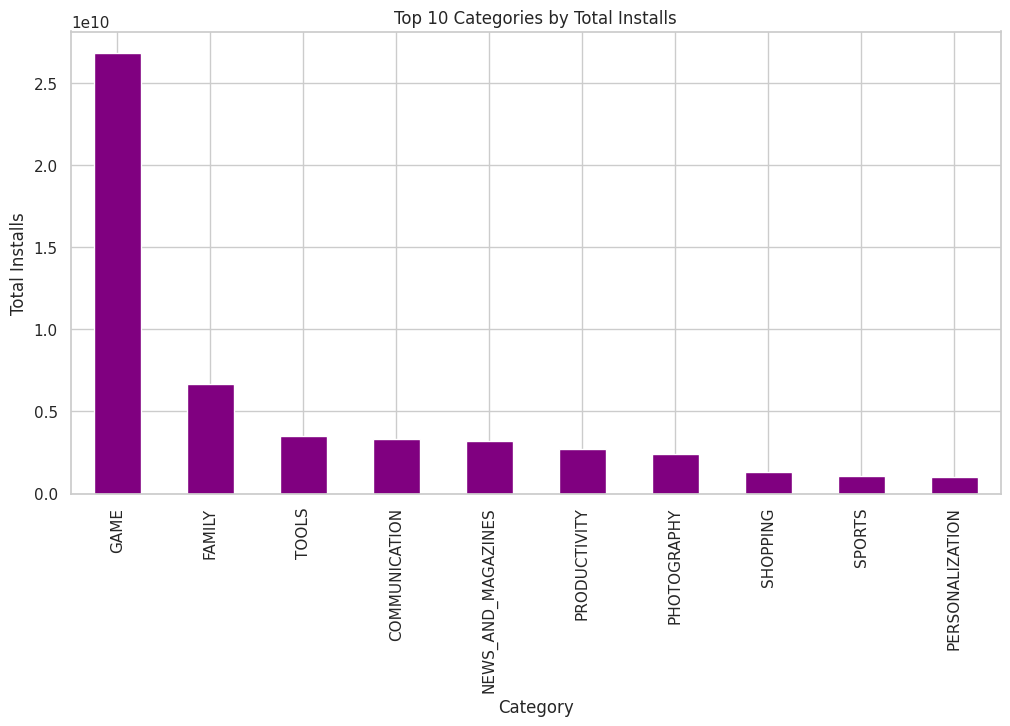

In [ ]:
plt.figure(figsize=(12,6))
category_installs.head(10).plot(kind='bar', color='purple')
plt.title("Top 10 Categories by Total Installs")
plt.xlabel("Category")
plt.ylabel("Total Installs")
plt.show()


CELL 3 — Final Interpretation

In [ ]:
top_cat = category_installs.index[0]
top_val = category_installs.iloc[0]

print("RQ3 FINAL INTERPRETATION:\n")

***RQ4 — Does app size affect the rating?***

CELL 1 — Scatter Plot (Size vs Rating)

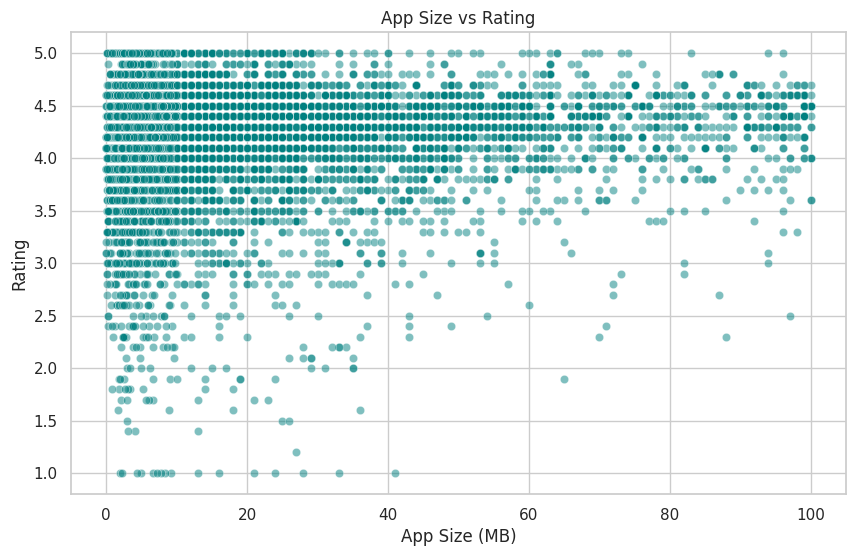

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=df_apps['Size_MB'], y=df_apps['Rating'], alpha=0.5, color='teal')
plt.title("App Size vs Rating")
plt.xlabel("App Size (MB)")
plt.ylabel("Rating")
plt.show()


CELL 2 — Correlation Calculation

In [ ]:
correlation = df_apps['Size_MB'].corr(df_apps['Rating'])
correlation


np.float64(0.08196852766905222)

CELL 3 — Final Interpretation

In [ ]:
corr_value = round(correlation, 3)

print("RQ4 FINAL INTERPRETATION:\n")

RQ4 FINAL INTERPRETATION:



***RQ5 — Which categories receive the most user reviews?***

CELL 1 — Total Reviews per Category

In [ ]:
category_reviews = df_apps.groupby('Category')['Reviews'].sum().sort_values(ascending=False)
category_reviews.head(10)


,Reviews
Category,
GAME,1206722017
FAMILY,288465593
TOOLS,105280118
COMMUNICATION,89076767
PHOTOGRAPHY,71721576
SPORTS,50911262
PRODUCTIVITY,42642801
SHOPPING,39515021
PERSONALIZATION,34852995


CELL 2 — Plot Top 10 Categories by Total Reviews

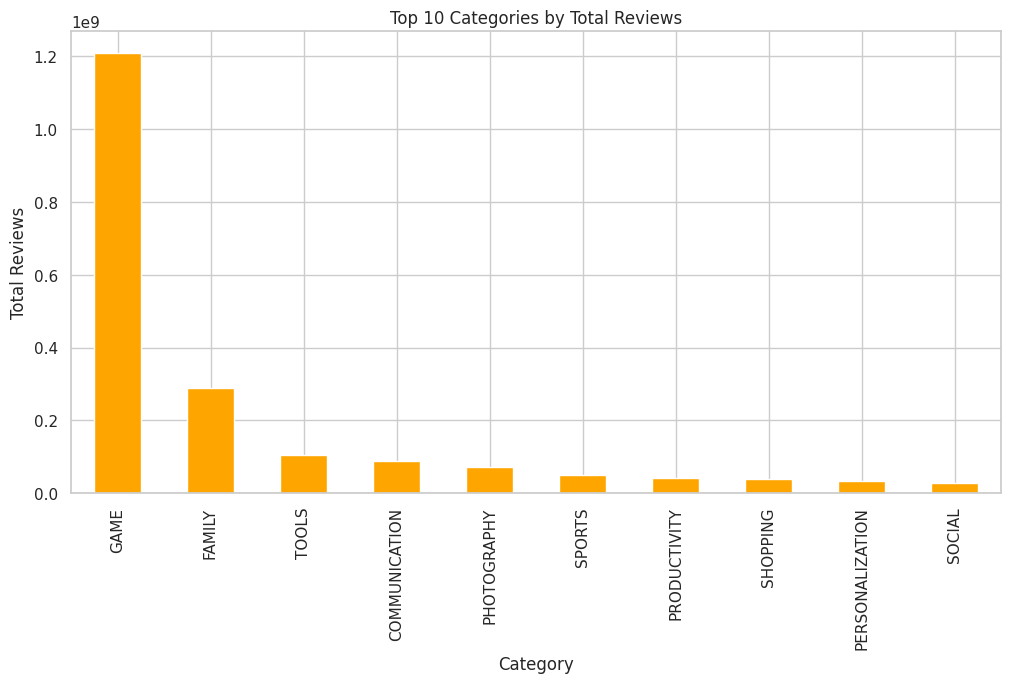

In [ ]:
plt.figure(figsize=(12,6))
category_reviews.head(10).plot(kind='bar', color='orange')
plt.title("Top 10 Categories by Total Reviews")
plt.xlabel("Category")
plt.ylabel("Total Reviews")
plt.show()


CELL 3 — Final Interpretation

In [ ]:
top_category = category_reviews.index[0]
top_value = category_reviews.iloc[0]

print("RQ5 FINAL INTERPRETATION:\n")

RQ5 FINAL INTERPRETATION:

